In [1]:
import pandas as pd
import numpy as np

#preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from scipy.stats import zscore
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

#feature selection
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

#model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

#evaluation
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(0)

In [3]:
original_df = pd.read_csv('Walmart.csv')

In [4]:
original_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
original_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
original_df['Date'] = pd.to_datetime(original_df.Date)

In [8]:
df = original_df.drop('Date', axis=1)
df.columns = df.columns.str.lower()

df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df['year'] = original_df.Date.dt.year
df['month'] = original_df.Date.dt.month
df['day'] = original_df.Date.dt.weekday

df.head()

,store,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,6
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,3
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,4
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,4
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,0


In [10]:
target = 'weekly_sales'
features = df.filter(regex='^(?!weekly_sales)').columns

print('Target column: ', target)
print('Feature columns: ', ', '.join(features))

Target column:  weekly_sales
Feature columns:  store, holiday_flag, temperature, fuel_price, cpi, unemployment, year, month, day


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   store         6435 non-null   int64  
 1   weekly_sales  6435 non-null   float64
 2   holiday_flag  6435 non-null   int64  
 3   temperature   6435 non-null   float64
 4   fuel_price    6435 non-null   float64
 5   cpi           6435 non-null   float64
 6   unemployment  6435 non-null   float64
 7   year          6435 non-null   int64  
 8   month         6435 non-null   int64  
 9   day           6435 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 502.9 KB


In [12]:
df.nunique()

store             45
weekly_sales    6435
holiday_flag       2
temperature     3528
fuel_price       892
cpi             2145
unemployment     349
year               3
month             12
day                7
dtype: int64

In [13]:
cat_features = ['store', 'holiday_flag', 'year', 'month', 'day']
num_features = df.columns[~df.columns.isin(cat_features+[target])]

In [14]:
sns.set_palette('rainbow_r')

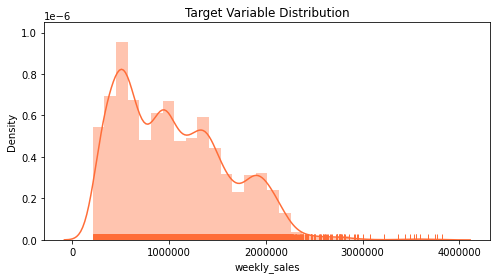

In [15]:
plt.figure(figsize=[8,4])
sns.distplot(df['weekly_sales'] , rug=True, bins=30
            )
plt.ticklabel_format(style='plain', axis='x')
plt.title('Target Variable Distribution')
plt.show()

In [16]:
cat_features

['store', 'holiday_flag', 'year', 'month', 'day']

<AxesSubplot:xlabel='holiday_flag', ylabel='count'>

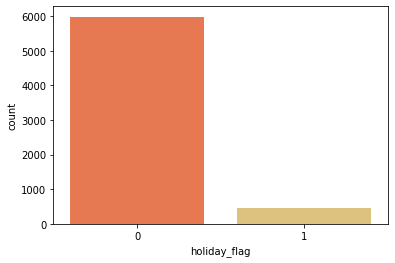

In [17]:
sns.countplot(df['holiday_flag'])

<AxesSubplot:xlabel='year', ylabel='count'>

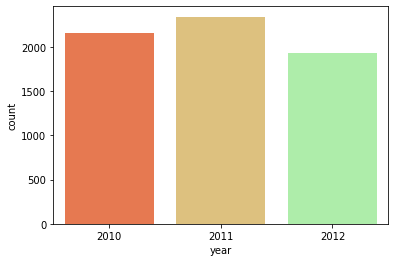

In [18]:
sns.countplot(df['year'])

<AxesSubplot:xlabel='month', ylabel='count'>

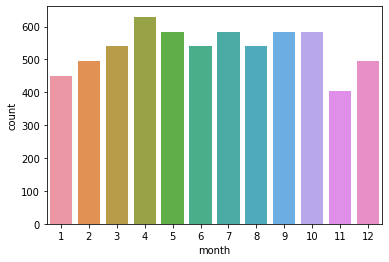

In [19]:
sns.countplot(df['month'])

<AxesSubplot:xlabel='day', ylabel='count'>

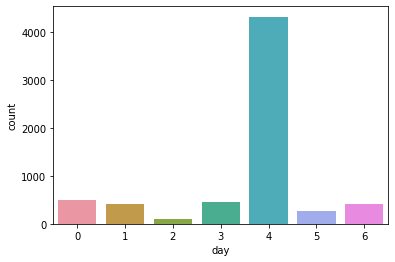

In [20]:
sns.countplot(df['day'])

<AxesSubplot:xlabel='store', ylabel='count'>

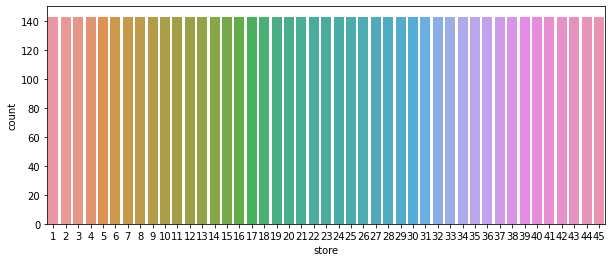

In [21]:
plt.figure(figsize=[10,4])
sns.countplot(df['store'])

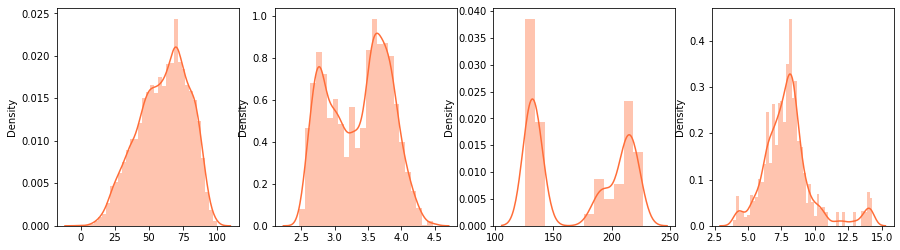

In [22]:
ncols=4
fig, ax = plt.subplots(nrows=int(np.ceil(len(num_features)/ncols)), ncols=ncols, figsize=[15,4])
for i in range(len(num_features)):
    sns.distplot(x=df[num_features[i]], ax=ax.flat[i])
plt.show()

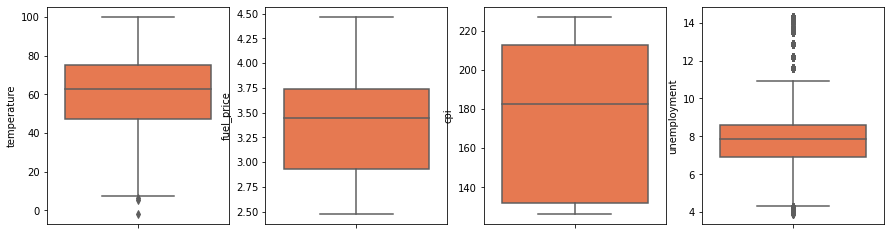

In [23]:
ncols=4
fig, ax = plt.subplots(nrows=int(np.ceil(len(num_features)/ncols)), ncols=ncols, figsize=[15,4])
for i in range(len(num_features)):
    sns.boxplot(y=df[num_features[i]], ax=ax.flat[i])
plt.show()

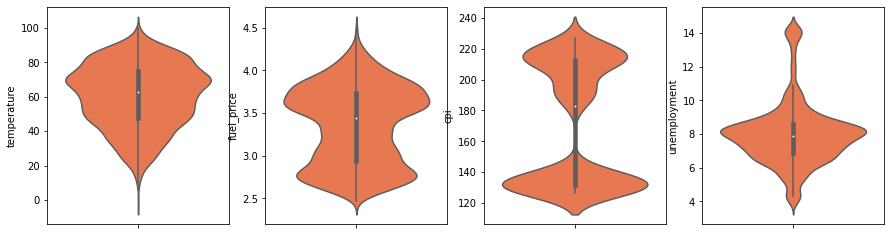

In [24]:
ncols=4
fig, ax = plt.subplots(nrows=int(np.ceil(len(num_features)/ncols)), ncols=ncols, figsize=[15,4])
for i in range(len(num_features)):
    sns.violinplot(y=df[num_features[i]], ax=ax.flat[i])
plt.show()

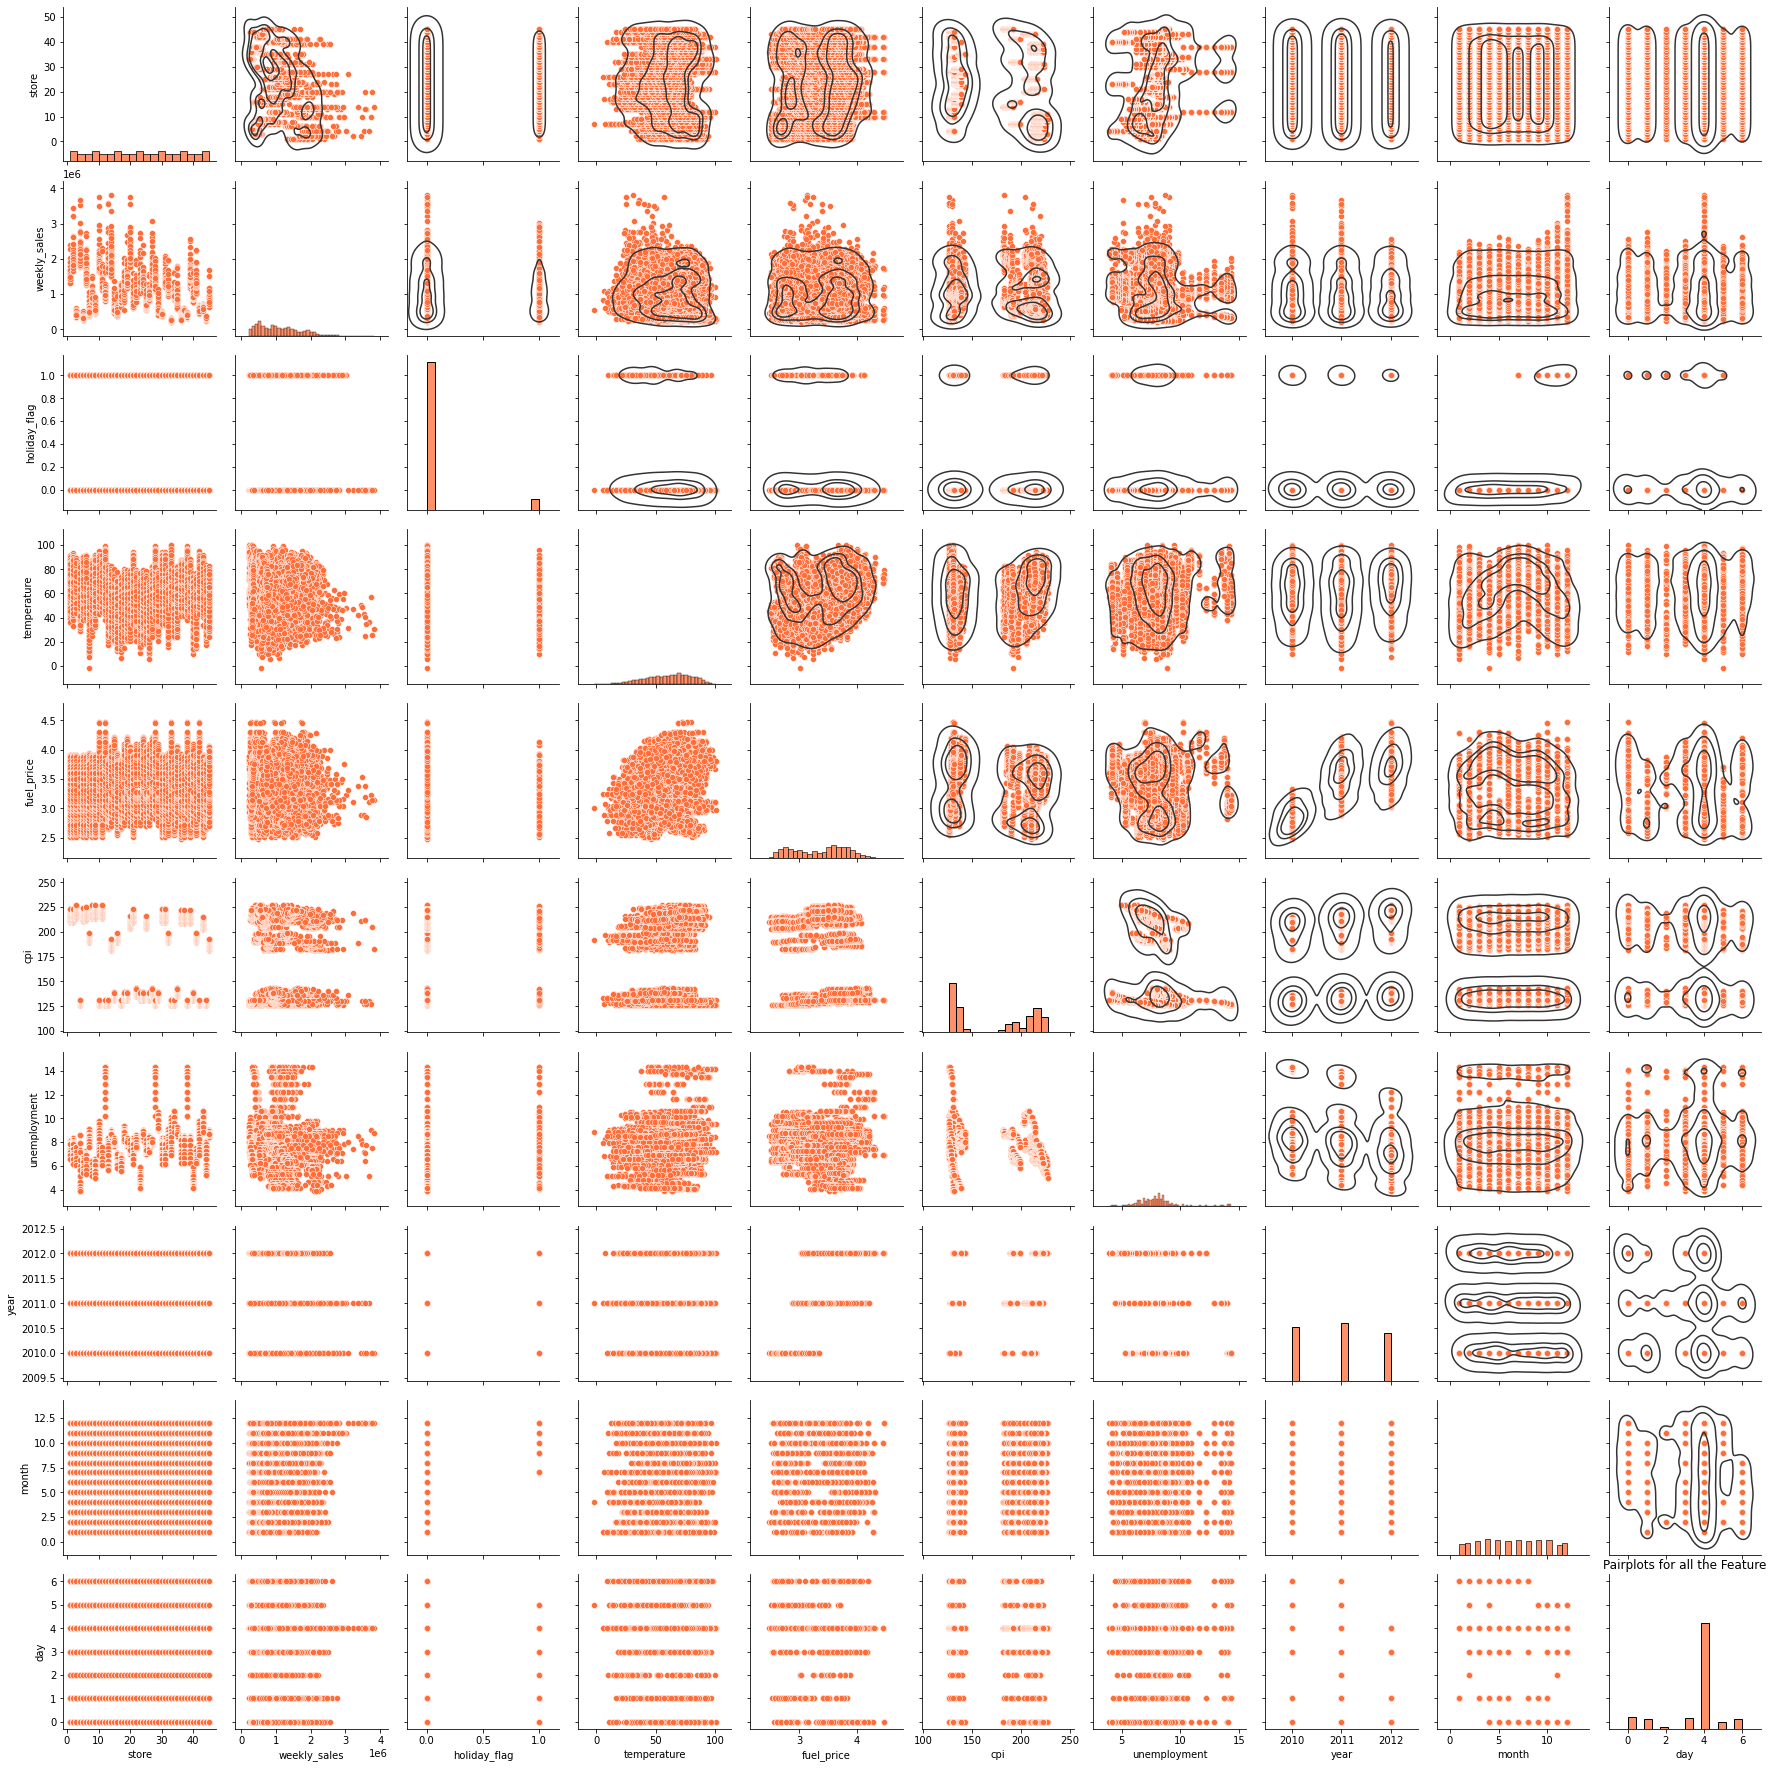

In [25]:
g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

In [21]:
df.duplicated().sum()

0

In [22]:
df[[i for i in cat_features if 'flag' not in i]] = df[[i for i in cat_features if 'flag' not in i]].astype(str)

In [23]:
df = pd.concat([df, pd.get_dummies(df[[i for i in cat_features if 'flag' not in i]], prefix_sep='_')], 
               axis=1).drop(
    ['store', 'day', 'month', 'year'], axis=1)

In [24]:
df_wnull = df.copy(deep=True)

In [25]:
for i in num_features:
    q1 = df[i].quantile(.25)
    q3 = df[i].quantile(.75)
    iqr = q3-q1
    df_wnull.loc[df[(df[i]>q3+(1.5*iqr))|(df[i]<q1-(1.5*iqr))].index, i] = np.nan
    df = df[(df[i]<=q3+(1.5*iqr))&(df[i]>=q1-(1.5*iqr))]


In [26]:
df_wnull.isnull().sum()[df_wnull.isnull().sum()>0]

temperature       3
unemployment    481
dtype: int64

In [27]:
df.shape

(5951, 73)

In [28]:
df.columns

Index(['weekly_sales', 'holiday_flag', 'temperature', 'fuel_price', 'cpi',
       'unemployment', 'store_1', 'store_10', 'store_11', 'store_12',
       'store_13', 'store_14', 'store_15', 'store_16', 'store_17', 'store_18',
       'store_19', 'store_2', 'store_20', 'store_21', 'store_22', 'store_23',
       'store_24', 'store_25', 'store_26', 'store_27', 'store_28', 'store_29',
       'store_3', 'store_30', 'store_31', 'store_32', 'store_33', 'store_34',
       'store_35', 'store_36', 'store_37', 'store_38', 'store_39', 'store_4',
       'store_40', 'store_41', 'store_42', 'store_43', 'store_44', 'store_45',
       'store_5', 'store_6', 'store_7', 'store_8', 'store_9', 'year_2010',
       'year_2011', 'year_2012', 'month_1', 'month_10', 'month_11', 'month_12',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'day_0', 'day_1', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6'],
      dtype='object')

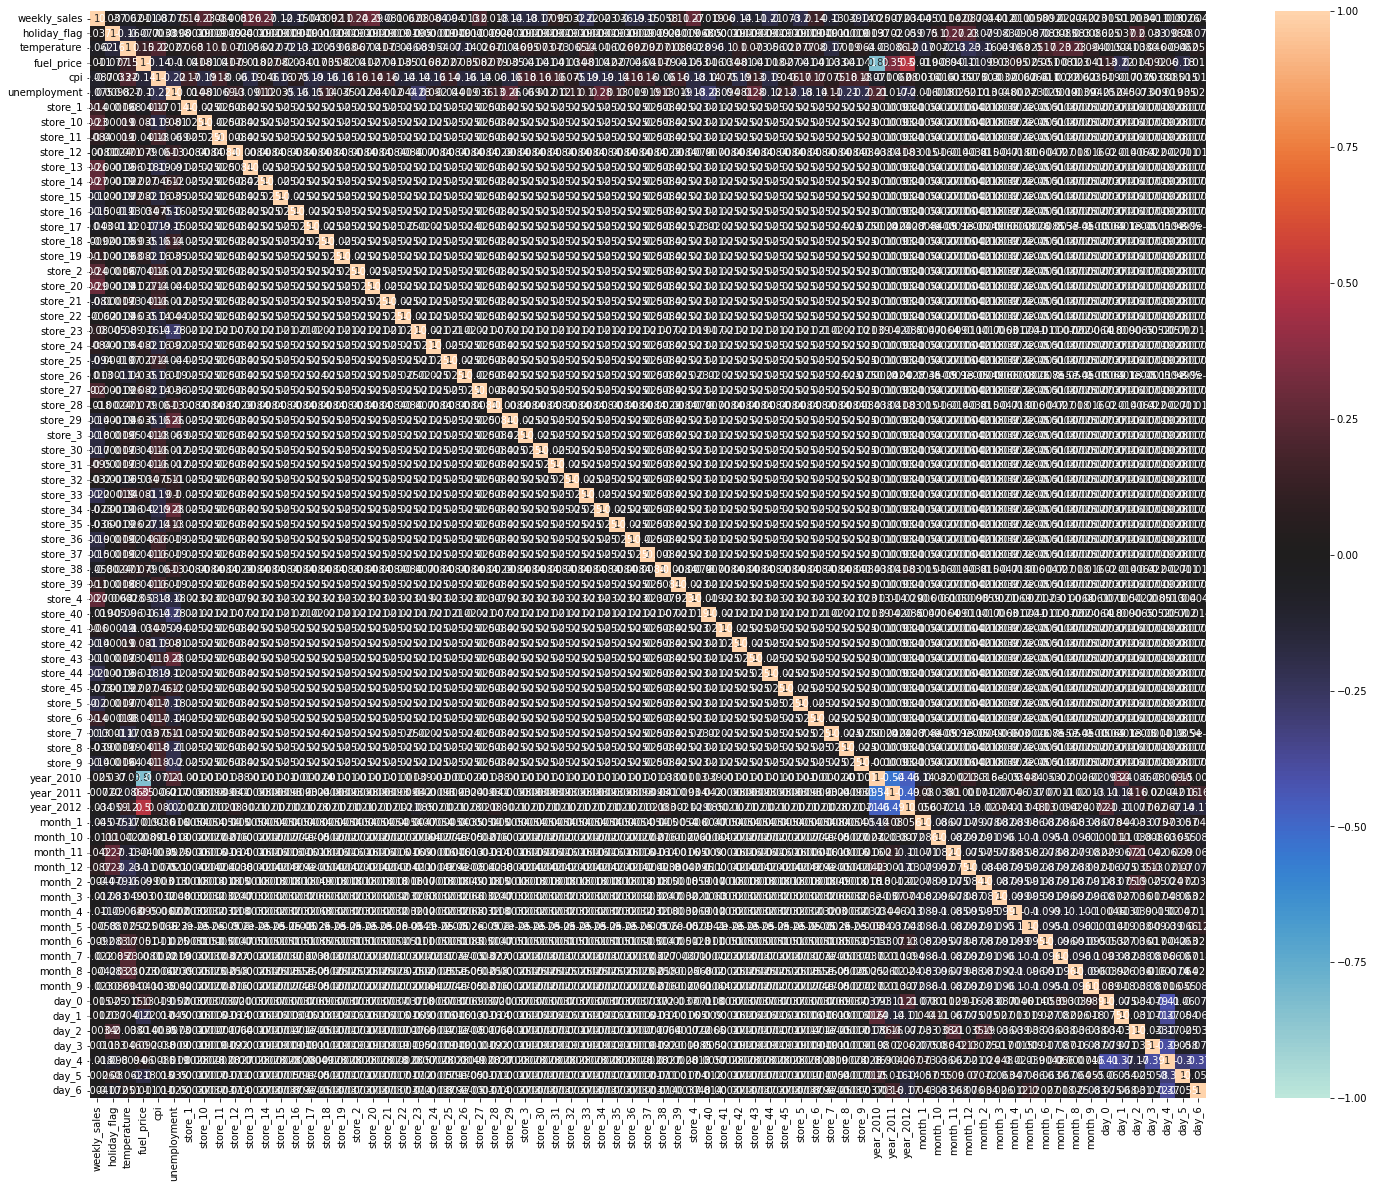

In [34]:
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('weekly_sales', axis=1), df.weekly_sales, 
                                                    train_size=0.8, test_size=0.2)

In [30]:
std = StandardScaler()

X_train_std = pd.DataFrame(std.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std.transform(X_test), columns=X_test.columns)

In [31]:
X_train_std.describe().round(3)

,holiday_flag,temperature,fuel_price,cpi,unemployment,store_1,store_10,store_11,store_12,store_13,...,month_7,month_8,month_9,day_0,day_1,day_2,day_3,day_4,day_5,day_6
count,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,...,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000,4760.000
mean,-0.000,0.000,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,...,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.274,-2.873,-1.814,-1.270,-2.769,-0.157,-0.156,-0.157,-0.052,-0.160,...,-0.317,-0.306,-0.322,-0.288,-0.259,-0.120,-0.276,-1.434,-0.205,-0.258
25%,-0.274,-0.736,-0.974,-1.098,-0.671,-0.157,-0.156,-0.157,-0.052,-0.160,...,-0.317,-0.306,-0.322,-0.288,-0.259,-0.120,-0.276,-1.434,-0.205,-0.258
50%,-0.274,0.116,0.172,0.383,0.110,-0.157,-0.156,-0.157,-0.052,-0.160,...,-0.317,-0.306,-0.322,-0.288,-0.259,-0.120,-0.276,0.697,-0.205,-0.258
75%,-0.274,0.779,0.832,0.984,0.632,-0.157,-0.156,-0.157,-0.052,-0.160,...,-0.317,-0.306,-0.322,-0.288,-0.259,-0.120,-0.276,0.697,-0.205,-0.258
max,3.646,2.156,2.483,1.323,2.608,6.384,6.413,6.384,19.109,6.245,...,3.153,3.270,3.106,3.475,3.856,8.307,3.623,0.697,4.878,3.883


Dropped Features -->  ['store_38', 'day_6', 'year_2011', 'month_1', 'cpi', 'store_9', 'unemployment', 'fuel_price', 'day_4', 'month_7', 'temperature', 'store_36', 'month_12', 'store_6', 'year_2012', 'month_2', 'store_3', 'month_10', 'store_45', 'month_11', 'store_19', 'store_33', 'year_2010', 'month_8', 'store_32', 'store_41', 'holiday_flag', 'store_1', 'month_9', 'store_10', 'store_11', 'store_42', 'store_34', 'month_3', 'store_16', 'store_31', 'store_39', 'store_30', 'store_35', 'store_29', 'month_6', 'store_8', 'day_5', 'store_27', 'day_3', 'store_26', 'store_25', 'store_24', 'store_2', 'store_37', 'store_4', 'day_2', 'day_1', 'store_23', 'month_5', 'store_22', 'store_13', 'store_14', 'store_15', 'store_17', 'store_18']


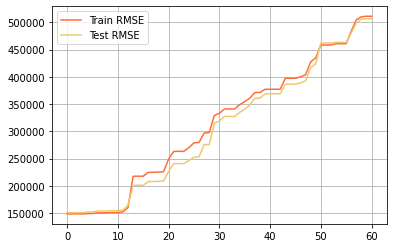

In [38]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

DROP=[];b=[]

for i in range(len(X_train_std.columns)):
    vif = pd.DataFrame()
    X = X_train_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(X_train_std.drop(DROP,axis=1), y_train)

        pred1 = LR.predict(X_train_std.drop(DROP,axis=1))
        pred2 = LR.predict(X_test_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))
        
print('Dropped Features --> ',DROP)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

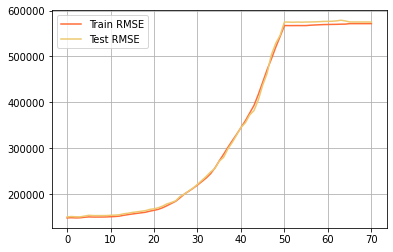

In [39]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
feature_space_df = pd.DataFrame(columns=['features', 'RMSE_train', 'RMSE_test'])

for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=X_train_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(X_train_std, y_train)

    LR = LinearRegression()
    LR.fit(X_train_std.loc[:,rfe.support_], y_train)

    pred1 = LR.predict(X_train_std.loc[:,rfe.support_])
    pred2 = LR.predict(X_test_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))
    
    feature_space_df = feature_space_df.append(
        {'features': X_train_std.columns[rfe.support_].values, 
         'RMSE_train': np.sqrt(mean_squared_error(y_train, pred1)),
         'RMSE_test': np.sqrt(mean_squared_error(y_test, pred2))}, 
        ignore_index=True)

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.75,20.75])
plt.legend()
plt.grid()
plt.show()

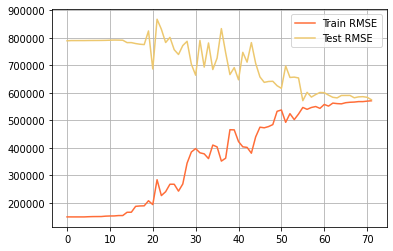

In [40]:
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]

m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=X_train_std.shape[1]-i)
    X_train_std_pca = pca.fit_transform(X_train_std)
    X_test_std_pca = pca.fit_transform(X_test_std)
    
    LR = LinearRegression()
    LR.fit(X_train_std_pca, y_train)

    pred1 = LR.predict(X_train_std_pca)
    pred2 = LR.predict(X_test_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(y_train, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(y_test, pred2)),2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
#plt.ylim([19.5,20.75])
plt.legend()
plt.grid()
plt.show()


In [141]:
import importlib
import sys
sys.path.insert(1, '../util_funcs')

import model_evaluation_funcs as me

importlib.reload(me)

<module 'model_evaluation_funcs' from 'C:\\Users\\Duygu\\PycharmProjects\\walmart\\../util_funcs\\model_evaluation_funcs.py'>

---------------------------------------- Linear Regression ----------------------------------------
-----Train Set Metrics-----
R-squared                         :  0.9325307514129901
Explained Variance Score          :  0.9325307799472452
Mean Absolute Error               :  90763.96899937573
Mean Squared Error                :  22049389882.440105
Mean Absolute Percentage Error    :  0.09600446143838369
Mean Squared Logarithmic Error    :  0.018581361210437686 

-----Train Set Plots-----


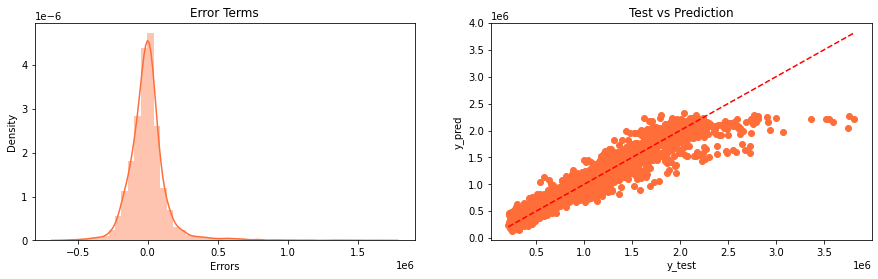

-----Test Set Metrics-----
R-squared                            :  0.9311968357912199
Explained Variance Score             :  0.9311979747753409
Mean Absolute Error                  :  90099.13788233328
Mean Squared Error                   :  22699707034.65225
Mean Absolute Percentage Error       :  0.09294867485350831
Mean Squared Logarithmic Error       :  0.016791670565367685 

-----Test Set Plots-----


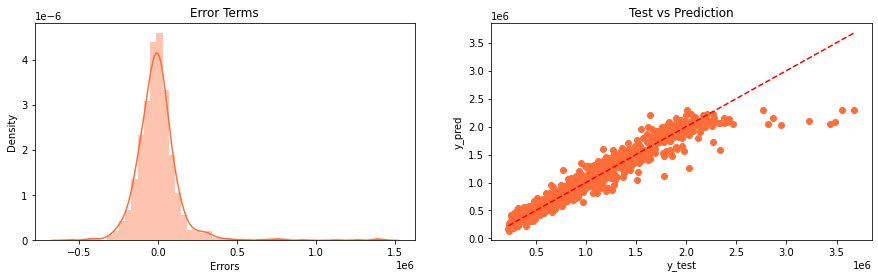

In [143]:
MLR = LinearRegression().fit(X_train_std,y_train)
pred_train = MLR.predict(X_train_std)
pred_test = MLR.predict(X_test_std)

model_evaluation_df = me.regression_evaluation('Linear Regression', y_test, pred_test, y_train, pred_train)

---------------------------------------- Ridge Regression ----------------------------------------
-----Train Set Metrics-----
R-squared                         :  0.9325224820242208
Explained Variance Score          :  0.9325224820242208
Mean Absolute Error               :  90639.87176894292
Mean Squared Error                :  22052092372.550533
Mean Absolute Percentage Error    :  0.09536388209556612
Mean Squared Logarithmic Error    :  0.018250984161215737 

-----Train Set Plots-----


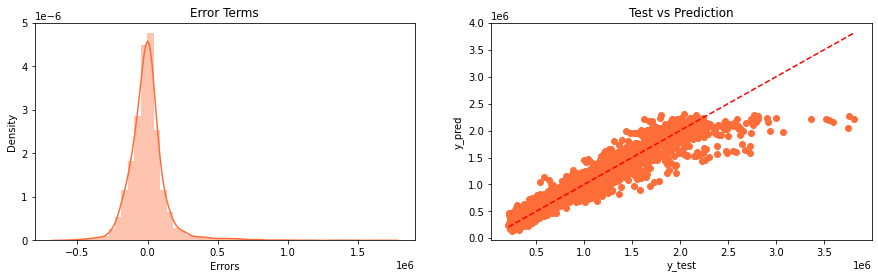

-----Test Set Metrics-----
R-squared                            :  0.9309518284541767
Explained Variance Score             :  0.930953792392107
Mean Absolute Error                  :  90225.03856711477
Mean Squared Error                   :  22780540450.32695
Mean Absolute Percentage Error       :  0.09271526714233327
Mean Squared Logarithmic Error       :  0.016591638496673722 

-----Test Set Plots-----


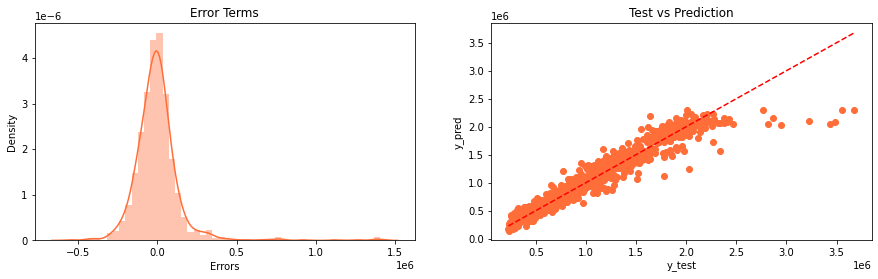

In [144]:
RLR = Ridge().fit(X_train_std,y_train)
pred_train = RLR.predict(X_train_std)
pred_test = RLR.predict(X_test_std)

model_evaluation_df.loc['Ridge Regression', : ] = (me.regression_evaluation('Ridge Regression',
                                                                            y_test, pred_test, 
                                                                            y_train, pred_train)).values[0]

---------------------------------------- Lasso Regression ----------------------------------------
-----Train Set Metrics-----
R-squared                         :  0.9324906750904807
Explained Variance Score          :  0.9324906750904807
Mean Absolute Error               :  90638.74889203237
Mean Squared Error                :  22062487085.66339
Mean Absolute Percentage Error    :  0.0953079203247739
Mean Squared Logarithmic Error    :  0.018228903067023634 

-----Train Set Plots-----


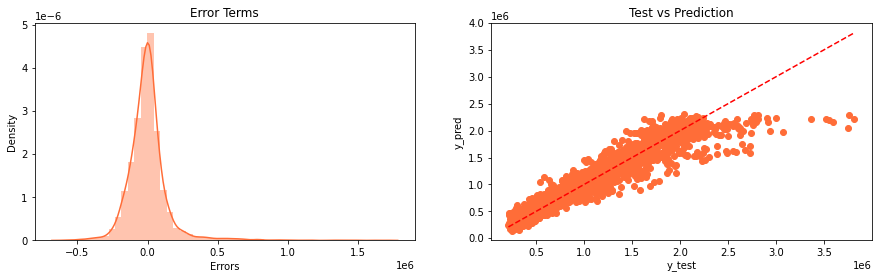

-----Test Set Metrics-----
R-squared                            :  0.9308844342616166
Explained Variance Score             :  0.93088652877685
Mean Absolute Error                  :  90255.87273247755
Mean Squared Error                   :  22802775306.013348
Mean Absolute Percentage Error       :  0.09268075768922919
Mean Squared Logarithmic Error       :  0.01657900870867034 

-----Test Set Plots-----


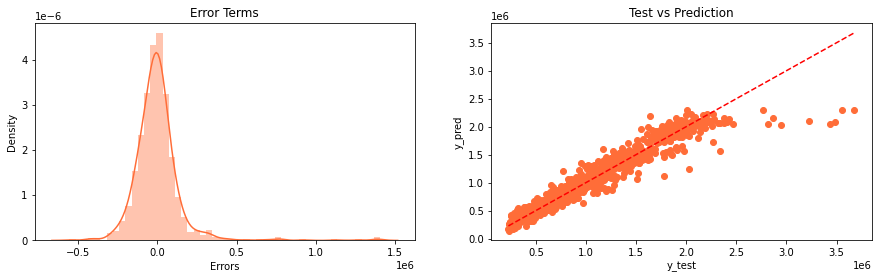

In [145]:
LLR = Lasso().fit(X_train_std,y_train)
pred_train = LLR.predict(X_train_std)
pred_test = LLR.predict(X_test_std)

model_evaluation_df.loc['Lasso Regression', : ] = (me.regression_evaluation('Lasso Regression',
                                                                            y_test, pred_test, 
                                                                            y_train, pred_train)).values[0]

---------------------------------------- ElasticNET Regression ----------------------------------------
-----Train Set Metrics-----
R-squared                         :  0.8326554574283963
Explained Variance Score          :  0.8326554574283963
Mean Absolute Error               :  175345.71902783038
Mean Squared Error                :  54689286469.54437
Mean Absolute Percentage Error    :  0.2390141759287845
Mean Squared Logarithmic Error    :  0.0751319173224029 

-----Train Set Plots-----


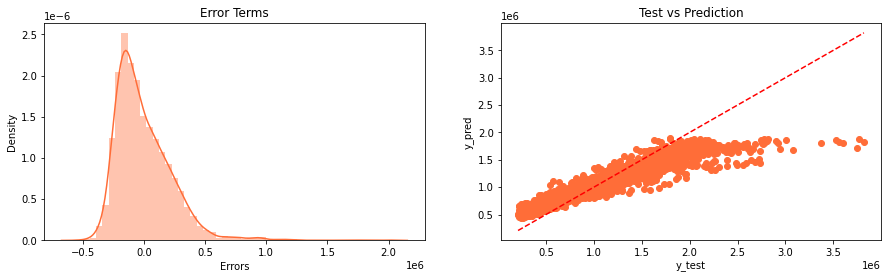

-----Test Set Metrics-----
R-squared                            :  0.8271811324165096
Explained Variance Score             :  0.8272304913582555
Mean Absolute Error                  :  174220.4998366899
Mean Squared Error                   :  57016820509.90588
Mean Absolute Percentage Error       :  0.22914087698326174
Mean Squared Logarithmic Error       :  0.07056527415883841 

-----Test Set Plots-----


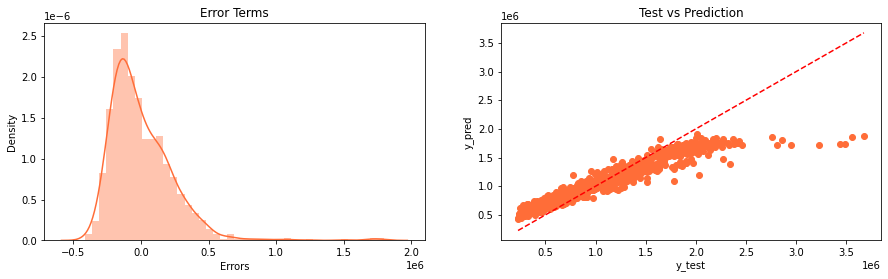

In [146]:
ENR = ElasticNet().fit(X_train_std,y_train)
pred_train = ENR.predict(X_train_std)
pred_test = ENR.predict(X_test_std)

model_evaluation_df.loc['ElasticNET Regression', : ] = (me.regression_evaluation('ElasticNET Regression',
                                                                            y_test, pred_test, 
                                                                            y_train, pred_train)).values[0]

In [33]:
# POLYNOMIAL

#train_rmse=[]; test_rmse=[]
#n_degree=3
#
#for i in range(2,n_degree):
#    #print(f'{i} Degree')
#    poly_reg = PolynomialFeatures(degree=i)
#    X_poly = poly_reg.fit_transform(X_train_std)
#    X_poly1 = poly_reg.fit_transform(X_test_std)
#    LR = LinearRegression()
#    LR.fit(X_poly, y_train)
#    
#    pred1 = LR.predict(X_poly)
#    train_rmse.append(np.sqrt(mean_squared_error(y_train, pred1)))
#    
#    pred2 = LR.predict(X_poly1)
#    test_rmse.append(np.sqrt(mean_squared_error(y_test, pred2)))